# Fighter Calibration Model

## Configure your Fighters here: 

In [47]:
# Define Fighter 1
fighter1_name = "Fighter #1"
fighter1_attack_range = [1,60]
fighter1_defense_range = [1,20]
fighter1_stamina_range = [1,45]
fighter1_speed_range = [1,25]

# Define Fighter 2
fighter2_name = "Fighter #2"
fighter2_attack_range = [1,20]
fighter2_defense_range = [1,60]
fighter2_stamina_range = [1,25]
fighter2_speed_range = [1,45]

number_of_fights = 1000
initial_health = 150

## Execute Fight(s)

In [48]:
from Objects.Fighter import Fighter
from Objects.Fight import Fight

In [49]:
for number in range(number_of_fights):
    f1 = Fighter(fighter1_name, fighter1_attack_range, fighter1_defense_range, fighter1_stamina_range, fighter1_speed_range, initial_health)
    f2 = Fighter(fighter2_name, fighter2_attack_range, fighter2_defense_range, fighter2_stamina_range, fighter2_speed_range, initial_health)
    
    f = Fight(number+1, f1, f2)

## Process Data

### Pick up and display sample of statistics file

In [50]:
import pandas as pd

df = pd.read_csv('statistics.csv')
df.head(50)

,fight_number,fight_round,fighter1_name,fighter1_strategy,fighter1_strategy_level,fighter1_characteristic_level,fighter1_health_in,fighter1_health_out,fighter1_score,fighter1_win,fighter2_name,fighter2_strategy,fighter2_strategy_level,fighter2_characteristic_level,fighter2_health_in,fighter2_health_out,fighter2_score,fighter2_win
0,1,1,Fighter #1,defense,8,25,150,146,7.5000,False,Fighter #2,attack,13,21,150,150,11.7975,True
1,1,2,Fighter #1,attack,2,11,146,120,1.6650,False,Fighter #2,defense,36,2,150,150,27.5400,True
2,1,3,Fighter #1,attack,53,22,120,120,32.3300,True,Fighter #2,defense,36,13,150,138,20.3400,False
3,1,4,Fighter #1,defense,8,29,120,120,5.1600,True,Fighter #2,attack,1,22,138,133,0.6100,False
4,1,5,Fighter #1,attack,37,20,120,120,33.3000,True,Fighter #2,attack,6,17,133,105,5.2650,False
5,1,6,Fighter #1,defense,14,37,120,120,14.3850,True,Fighter #2,attack,14,25,105,104,13.1250,False
6,1,7,Fighter #1,attack,37,13,120,120,20.9050,True,Fighter #2,defense,6,1,104,86,3.0300,False
7,1,8,Fighter #1,attack,10,14,120,120,8.5500,False,Fighter #2,attack,10,16,86,86,8.7000,True
8,1,9,Fighter #1,defense,8,14,120,110,6.8400,False,Fighter #2,defense,20,12,86,86,16.8000,True
9,1,10,Fighter #1,defense,15,17,110,110,8.7750,True,Fighter #2,attack,1,29,86,78,0.6450,False


### Summarize data and group

In [51]:
df_fightround = df[['fight_number','fight_round']]
df_grouped = df_fightround.groupby('fight_number')
df_max = df_grouped.max().reset_index()

f1_winner_balance_round = df[df.fighter1_win == True].shape[0]/len(df)
f2_winner_balance_round = df[df.fighter2_win == True].shape[0]/len(df)

pd.set_option("display.max_rows", None, "display.max_columns", None)

df_group = df.groupby(['fight_number'], sort=False)[['fight_round', 'fighter1_health_out', 'fighter2_health_out']].agg({'fighter1_health_out': ['min'], 'fighter2_health_out': ['min']})

df_group['winner'] = 2
df_group.loc[df_group['fighter1_health_out']['min'] > df_group['fighter2_health_out']['min'], 'winner'] = 1

f1_winner_balance_fight = df_group[df_group.winner == 1].shape[0]/len(df_group)
f2_winner_balance_fight = df_group[df_group.winner == 2].shape[0]/len(df_group)

## Generate Chart

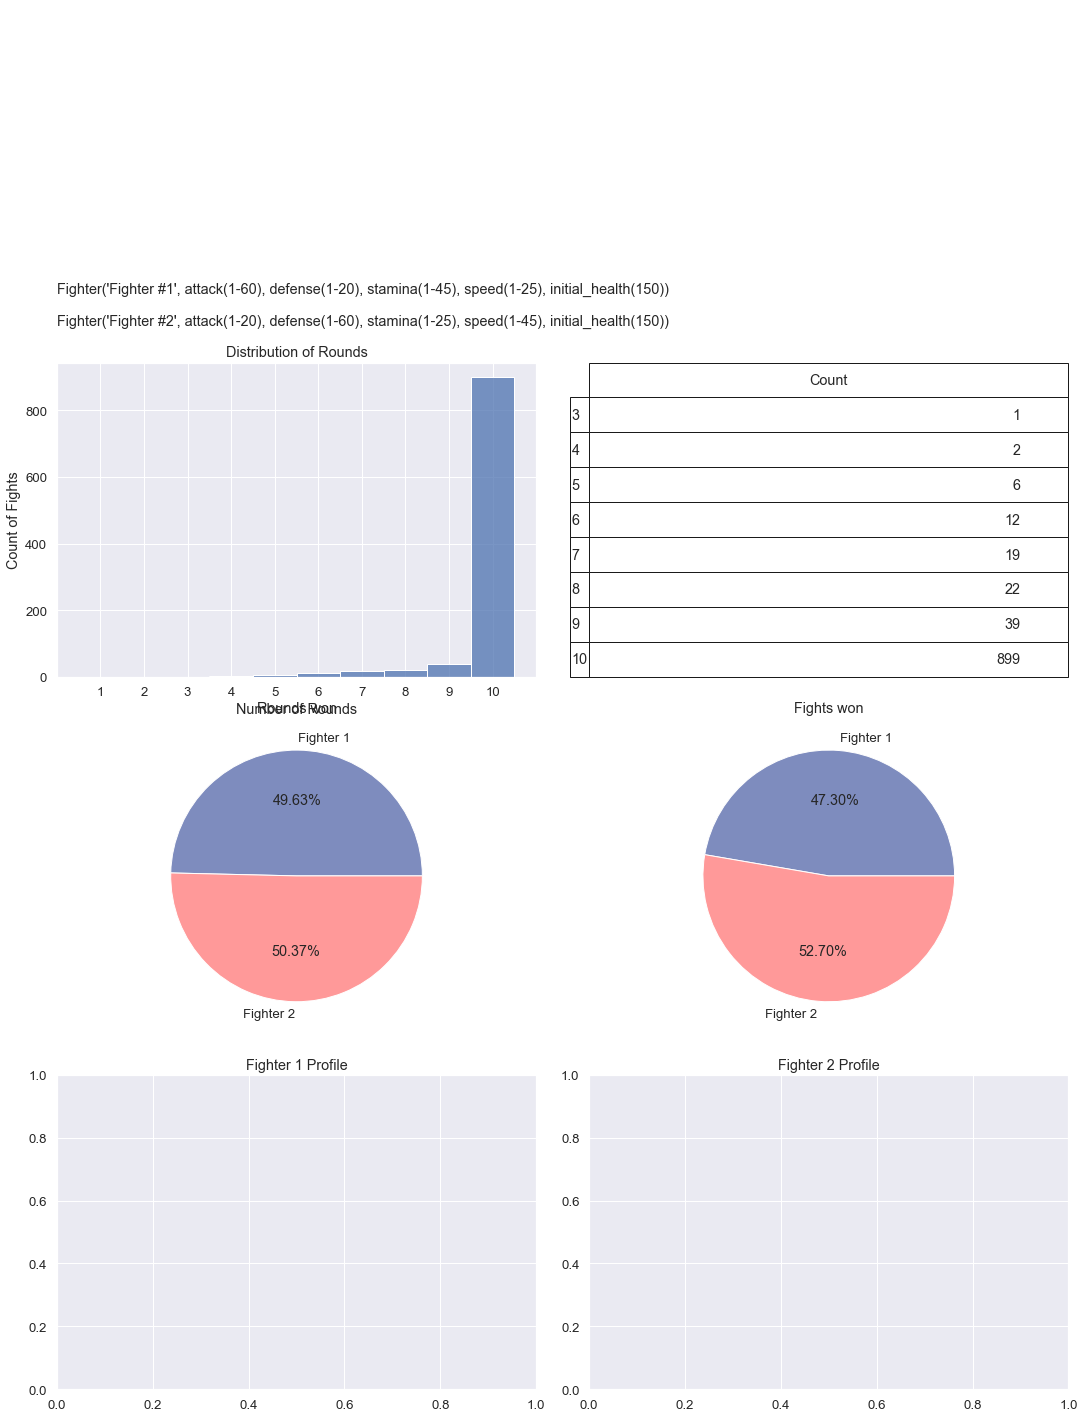

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
plt.tight_layout()

# define axs[0,0] to [0,2]  (fighter stats)
#fig.set_tight_layout(False)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,0].text(0,0,f2.__str__(), va="center")
axs[0,0].text(0,0.1,f1.__str__(), va="center")

# define axs[1,0] (plot)

sns.set(style="darkgrid", font_scale=1.2)

chart = sns.histplot(
                    data=df_max,
                    x="fight_round",
                    ax=axs[1,0], 
                    discrete=True
                    )

chart.set(
            xticks=[1,2,3,4,5,6,7,8,9,10],
            xlabel="Number of Rounds",
            ylabel="Count of Fights",
            title="Distribution of Rounds",
            xlim=(0,11)
        )

# define axs[1,1] (table)

#plt.rcParams["figure.autolayout"] = True
v = pd.DataFrame(df_max['fight_round'].value_counts()).sort_index()
axs[1,1].axis('off')
table = axs[1,1].table(cellText=v.values, rowLabels=v.index, bbox=[0,0,1,1], colLabels=["Count"])

# define axs[2,0] (winner/loser balance in Rounds)

axs[2,0].pie([f1_winner_balance_round, f2_winner_balance_round],
           labels = ['Fighter 1', 'Fighter 2'], 
           colors = ['#7e8cbe','#ff9999'], autopct='%.2f%%')

axs[2,0].set_title('Rounds won')


# define axs[2,1] (winner/loser balance in Fights)
axs[2,1].pie([f1_winner_balance_fight, f2_winner_balance_fight],
           labels = ['Fighter 1', 'Fighter 2'], 
           colors = ['#7e8cbe','#ff9999'], autopct='%.2f%%')

axs[2,1].set_title('Fights won')

#define axs[3,0] (Fighter 1 profile)
axs[3,0].set_title('Fighter 1 Profile')

#define axs[3,1] (Fighter 2 profile)
axs[3,1].set_title('Fighter 2 Profile')

plt.show()

## Move Statistics to Archive

In [53]:
import os

counter = 0

# find the latest file number in archives, increase by 1
# if no file is found yet, start counter at 1
filelist = os.listdir("./Archives")
if  filelist == []:
    counter = 1
else:
    filelist.sort()
    counter = int(os.path.basename(filelist[-1])[0]) + 1

# save chart and table as PDF
fig.savefig("Archives/%i.pdf" % counter)

# move statistics file to archive
os.rename("statistics.csv", "Archives/%i.csv" % counter)